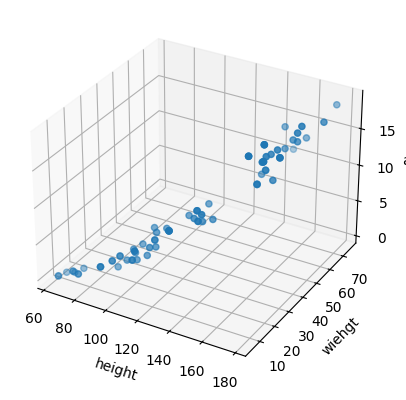

In [1]:
# test_1
# 제공된 데이터 파일을 불러들여 x축은 키(cm), y축은 몸무게(kg), z축은 나이를 나타내는 3차원 공간에 각 데이터의 위치를 점으로 표시하시오.
# 결과물 : 코드, 매개변수
# Hint) scatter 함수 사용

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("multiple_linear_regression_data.csv", names=['height','weight','age'])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

height = data['height'].to_numpy()
weight = data['weight'].to_numpy()
age = data['age'].to_numpy()

ax.scatter(height, weight, age)
ax.set_xlabel('height')
ax.set_ylabel('wiehgt')
ax.set_zlabel('age')
plt.show()

[[  0.16248137]
 [  0.01980255]
 [-12.27584624]]


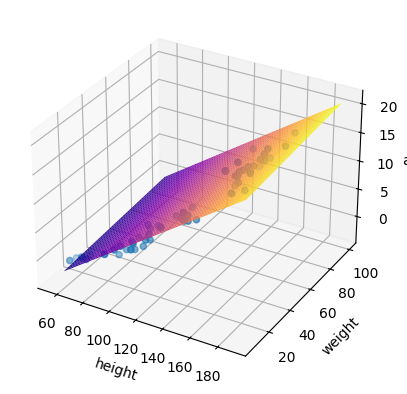

In [16]:
# test_2
# 해석해로 구한 선형모델과 데이터를 한 그래프에 표시하시오.
# 결과물 : 그래프

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("multiple_linear_regression_data.csv", names= ['height','weight','age'])
height = data['height'].to_numpy()
weight = data['weight'].to_numpy()
age = data['age'].to_numpy()

X = np.c_[height, weight, np.ones(len(height))]
y = age.reshape(len(age),1)

# 가중치 계산
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y

#예측을 위한 grid 생성
height_data = np.linspace(55, 190,1000)
weight_data = np.linspace(10, 100,1000)
Height, Weight = np.meshgrid(height_data, weight_data)
# grid 위에서의 예측값 계산_ 해석해
analytic_y = analytic_W[0]*Height + analytic_W[1]*Weight + analytic_W[2]
print(f'{analytic_W}')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(height, weight, age)
ax.plot_surface(Height, Weight, analytic_y, cmap='plasma')
ax.set_xlabel('height')
ax.set_ylabel('weight')
ax.set_zlabel('age')
plt.show()


In [15]:
# test_3
# 해석해로 구한 선형모델의 평균제곱오차를 구하라.
# 결과물 : 코드, 평균제곱오차

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('multiple_linear_regression_data.csv', names=['height','weight','age'])
height = data['height'].to_numpy()
weight = data['weight'].to_numpy()
age = data['age'].to_numpy() 

X = np.c_[height, weight, np.ones(len(height))]
y = age.reshape(len(age),1)

# analytic_W
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y

# MSE
def function_MSE(W,X,y):
    predict = X.dot(W)
    error = predict - y
    mse = (error ** 2).mean()
    return mse


mse = function_MSE(analytic_W, X, y)
print(f'mse: {mse}')

mse: 1.842543756114167


random w: 
[[  0.11585499]
 [  0.1194467 ]
 [-10.20798565]]
epoch:0 ===> W: [  0.11674604   0.11959903 -10.20797809], gradient:[-89.10570565 -15.2329458   -0.75643094], mse:2.9483141473082384
epoch:100 ===> W: [  0.12255473   0.11343796 -10.207846  ], gradient:[-1.77813768  6.77741603 -0.09475397], mse:2.3805446554768195
epoch:200 ===> W: [  0.1242307    0.10705001 -10.20775908], gradient:[-1.57970824  6.02096721 -0.0795442 ], mse:2.291008780024697
epoch:300 ===> W: [  0.12571965   0.10137503 -10.20768649], gradient:[-1.4034286   5.34895679 -0.06603233], mse:2.2201436026299928
epoch:400 ===> W: [  0.12704245   0.09633345 -10.20762664], gradient:[-1.24682613  4.75195938 -0.05402884], mse:2.1640360445711613
epoch:500 ===> W: [  0.12821765   0.09185455 -10.2075781 ], gradient:[-1.10770438  4.22160168 -0.04336534], mse:2.1195953505117493
epoch:600 ===> W: [  0.12926172   0.08787552 -10.20753961], gradient:[-0.98411206  3.75044504 -0.03389227], mse:2.084380031822776
epoch:700 ===> W: [  0.1

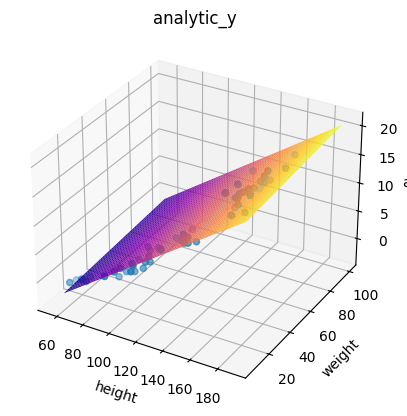

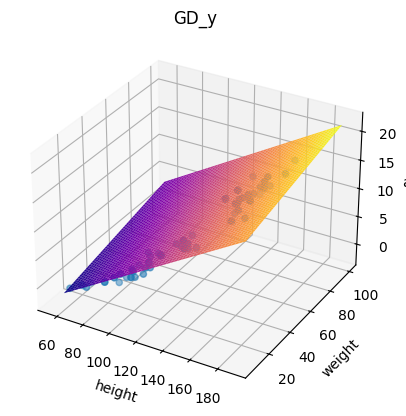

In [22]:
# test_4
# 경사하강법 프로그램을 이용해 최적 매개변수를 구하라.
# 단, 경사하강법 외부 함수 사용 금지!
# 단, 학습률, 초기값, 반복 회수는 임의로 정하여 사용!
# 결과물: 코드
# 결과물: 학습률, 초기값, 반복 횟수, 최종 평균제곱오차, 최적 매개변수

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("multiple_linear_regression_data.csv", names= ['height','weight','age'])
height = data['height'].to_numpy()
weight = data['weight'].to_numpy()
age = data['age'].to_numpy()

X = np.c_[height, weight, np.ones(len(height))]
y = age.reshape(len(age),1)

#예측을 위한 grid 생성 ################################################################
height_data = np.linspace(55, 190,1000)
weight_data = np.linspace(10, 100,1000)
Height, Weight = np.meshgrid(height_data, weight_data)

# analytic_y 해석해 ################################################################
analytic_W = np.linalg.pinv(X.T @ X) @ X.T @ y
analytic_y = analytic_W[0]*Height + analytic_W[1]*Weight + analytic_W[2]

# MSE by analytic_W ###############################################################
def function_MSE(W,X,y):
    predict = X.dot(W)
    error = predict - y
    mse = (error ** 2).mean()
    return mse

# grad ############################################################################
def numerical_gradient(f,W,X,y):
    h = 1e-4
    grad = np.zeros_like(W)
    
    for idx in range(W.size):
        tmp_val = W[idx]
        # f(x+h)
        W[idx] = tmp_val + h
        fxh1 = f(W, X, y)
        # f(x-h)
        W[idx] = tmp_val - h
        fxh2 = f(W, X, y)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        W[idx] = tmp_val
    
    return grad
####################################################################################

# 경사하강법 실행 ####################################################################
num_epoch = 100_000
eta = 1e-5
errors = []
GD_W0_history = []
GD_W1_history = []
GD_W2_history = []

GD_W = np.zeros((3,1))
GD_W[0] = np.random.uniform(low=-1.0, high=1.0)
GD_W[1] = np.random.uniform(low=-1.0, high=1.0)
GD_W[2] = np.random.uniform(low=-13.0, high=-10.0)
print(f'random w: \n{GD_W}')


for epoch in range(num_epoch):
    mse = function_MSE(GD_W, X, y)
    gradient = numerical_gradient(function_MSE, GD_W, X, y)
    GD_W -= eta * gradient
    
    if mse < 1.7:
        print('GD end')
        break
    
    errors.append(mse)
    GD_W0_history.append(GD_W[0])
    GD_W1_history.append(GD_W[1])
    GD_W2_history.append(GD_W[2])

    if epoch%100 == 0:
        print(f'epoch:{epoch} ===> W: {GD_W.flatten()}, gradient:{gradient.flatten()}, mse:{mse}')
    
GD_y = GD_W[0]*Height + GD_W[1]*Weight + GD_W[2]

####################################################################################

fig = plt.figure(1)
ax = fig.add_subplot(projection='3d')
ax.scatter(height, weight, age)
ax.plot_surface(Height, Weight, analytic_y, cmap='plasma')
ax.set_xlabel('height')
ax.set_ylabel('weight')
ax.set_zlabel('age')
ax.set_title('analytic_y')
plt.show()

fig = plt.figure(2)
ax = fig.add_subplot(projection='3d')
ax.scatter(height, weight, age)
ax.plot_surface(Height, Weight, GD_y, cmap='plasma')
ax.set_xlabel('height')
ax.set_ylabel('weight')
ax.set_zlabel('age')
ax.set_title('GD_y')
plt.show()

In [ ]:
# test_5
# 주어진 데이터에 대해 K개의 가우스 함수를 이용한 선형 기저함수 회귀모델의 최적 매개변수(해석해)를 자동 계산하는 프고그램을 
#   작성하고, K가 3,5,8 일 때의 매개변수를 구하라.
# 결과물 : 코드, 매개변수 

